# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('../data/liquor_store_sales.csv')
data.head()

Year  Month                      Supplier ItemCode  \
0  2017      4               ROYAL WINE CORP   100200   
1  2017      4      SANTA MARGHERITA USA INC   100749   
2  2017      4            JIM BEAM BRANDS CO    10103   
3  2017      4  HEAVEN HILL DISTILLERIES INC    10120   
4  2017      4               ROYAL WINE CORP   101664   

                             Description ItemType  RetailSales  \
0                      GAMLA CAB - 750ML     WINE          0.0   
1   SANTA MARGHERITA P/GRIG ALTO - 375ML     WINE          0.0   
2  KNOB CREEK BOURBON 9YR - 100P - 375ML   LIQUOR          0.0   
3          J W DANT BOURBON 100P - 1.75L   LIQUOR          0.0   
4            RAMON CORDOVA RIOJA - 750ML     WINE          0.0   

   RetailTransfers  WarehouseSales  
0              1.0             0.0  
1              1.0             0.0  
2              8.0             0.0  
3              2.0             0.0  
4              4.0             0.0

## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

In [3]:
data_total = data.groupby('ItemType').agg({'RetailSales' : 'sum','RetailTransfers' : 'sum', 'WarehouseSales' : 'sum',})
data_total

RetailSales  RetailTransfers  WarehouseSales
ItemType                                                  
BEER            209763.11        234924.44      2437617.32
DUNNAGE              0.00             0.00       -45331.00
KEGS                 0.00             0.00        43558.00
LIQUOR          309847.85        334176.41        33173.32
NON-ALCOHOL       8109.97          9058.37         8656.72
REF                281.34           171.92        -6754.00
STR_SUPPLIES       995.98          3594.70            0.00
WINE            313400.42        340710.51       433009.47

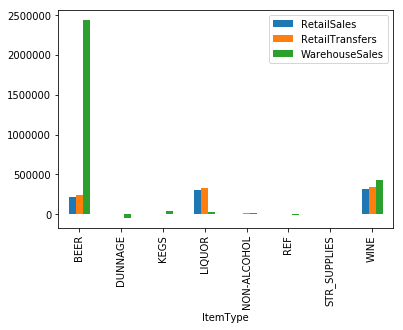

In [4]:
data_total.plot.bar()

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

In [5]:
data_total_1 = data.groupby('Supplier').agg({'RetailSales' : 'sum','RetailTransfers' : 'sum', 'WarehouseSales' : 'sum',})
data_total_1.head()


RetailSales  RetailTransfers  WarehouseSales
Supplier                                                           
8 VINI INC                    2.78             2.00            1.00
A HARDY USA LTD               0.40             0.00            0.00
A I G WINE & SPIRITS         12.52             5.92          134.00
A VINTNERS SELECTIONS      8640.57          8361.10        29776.67
A&E INC                      11.52             2.00            0.00

In [6]:
data_total_1['Total_Sales'] = data_total_1.sum(axis=1)
data_total_1.head()

RetailSales  RetailTransfers  WarehouseSales  \
Supplier                                                              
8 VINI INC                    2.78             2.00            1.00   
A HARDY USA LTD               0.40             0.00            0.00   
A I G WINE & SPIRITS         12.52             5.92          134.00   
A VINTNERS SELECTIONS      8640.57          8361.10        29776.67   
A&E INC                      11.52             2.00            0.00   

                       Total_Sales  
Supplier                            
8 VINI INC                    5.78  
A HARDY USA LTD               0.40  
A I G WINE & SPIRITS        152.44  
A VINTNERS SELECTIONS     46778.34  
A&E INC                      13.52

In [7]:
total_sales = data_total_1.nlargest(10, 'Total_Sales')['Total_Sales']
total_sales

Supplier
MILLER BREWING COMPANY      646822.71
CROWN IMPORTS               636094.20
ANHEUSER BUSCH INC          583737.97
HEINEKEN USA                362740.01
E & J GALLO WINERY          218180.45
DIAGEO NORTH AMERICA INC    174877.36
CONSTELLATION BRANDS        159983.37
JIM BEAM BRANDS CO           85105.83
THE WINE GROUP               80823.98
BOSTON BEER CORPORATION      76064.12
Name: Total_Sales, dtype: float64

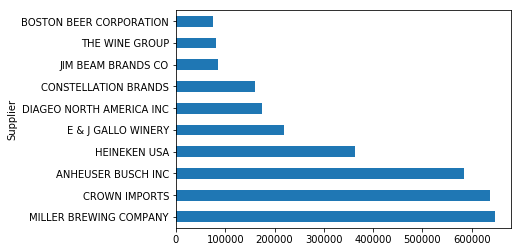

In [8]:
total_sales.plot.barh()

## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

In [9]:
sales_per_month = data.groupby('Month').agg({'RetailSales' : 'mean','RetailTransfers' : 'mean', 'WarehouseSales' : 'mean',})
sales_per_month.head()


RetailSales  RetailTransfers  WarehouseSales
Month                                              
1         5.679413         5.574833       19.072137
2         5.939247         6.050136       20.229658
4         0.000000        15.707503        0.000000
5         7.038838         7.421817       27.310548
6         7.143914         6.950396       27.839069

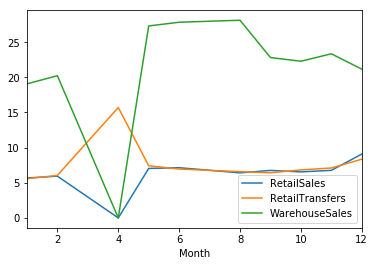

In [10]:
sales_per_month.plot(y=["RetailSales", "RetailTransfers", "WarehouseSales"])


## 4. Plot the same information as above but as a bar chart.

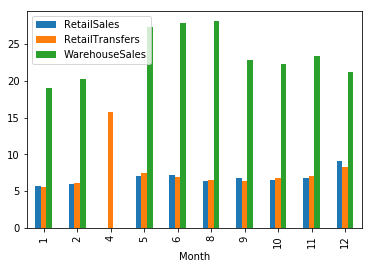

In [11]:
sales_per_month.plot.bar()

## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

In [18]:
data['year_month'] = data['Year'].astype(str) + '/' + data['Month'].astype(str)
data.head()

Year  Month                      Supplier ItemCode  \
0  2017      4               ROYAL WINE CORP   100200   
1  2017      4      SANTA MARGHERITA USA INC   100749   
2  2017      4            JIM BEAM BRANDS CO    10103   
3  2017      4  HEAVEN HILL DISTILLERIES INC    10120   
4  2017      4               ROYAL WINE CORP   101664   

                             Description ItemType  RetailSales  \
0                      GAMLA CAB - 750ML     WINE          0.0   
1   SANTA MARGHERITA P/GRIG ALTO - 375ML     WINE          0.0   
2  KNOB CREEK BOURBON 9YR - 100P - 375ML   LIQUOR          0.0   
3          J W DANT BOURBON 100P - 1.75L   LIQUOR          0.0   
4            RAMON CORDOVA RIOJA - 750ML     WINE          0.0   

   RetailTransfers  WarehouseSales year_month  
0              1.0             0.0     2017/4  
1              1.0             0.0     2017/4  
2              8.0             0.0     2017/4  
3              2.0             0.0     2017/4  
4              4.0             0.0     2017/4

In [26]:
data.sort_values(['Year', 'Month'], ascending=[True, True])
data.head()

Year  Month                      Supplier ItemCode  \
0  2017      4               ROYAL WINE CORP   100200   
1  2017      4      SANTA MARGHERITA USA INC   100749   
2  2017      4            JIM BEAM BRANDS CO    10103   
3  2017      4  HEAVEN HILL DISTILLERIES INC    10120   
4  2017      4               ROYAL WINE CORP   101664   

                             Description ItemType  RetailSales  \
0                      GAMLA CAB - 750ML     WINE          0.0   
1   SANTA MARGHERITA P/GRIG ALTO - 375ML     WINE          0.0   
2  KNOB CREEK BOURBON 9YR - 100P - 375ML   LIQUOR          0.0   
3          J W DANT BOURBON 100P - 1.75L   LIQUOR          0.0   
4            RAMON CORDOVA RIOJA - 750ML     WINE          0.0   

   RetailTransfers  WarehouseSales year_month  
0              1.0             0.0     2017/4  
1              1.0             0.0     2017/4  
2              8.0             0.0     2017/4  
3              2.0             0.0     2017/4  
4              4.0             0.0     2017/4

In [27]:
retail_sales_per_year_month = data.groupby('year_month').agg({'RetailSales' : 'sum', 'Year': 'mean', 'Month': 'mean'})

RetailSales  Year  Month
year_month                          
2017/10        89236.96  2017     10
2017/11        98316.19  2017     11
2017/12       131634.49  2017     12
2017/4             0.00  2017      4
2017/5         94693.49  2017      5
2017/6         97357.26  2017      6
2017/8         87111.78  2017      8
2017/9         90452.60  2017      9
2018/1         75791.77  2018      1
2018/2         77804.13  2018      2

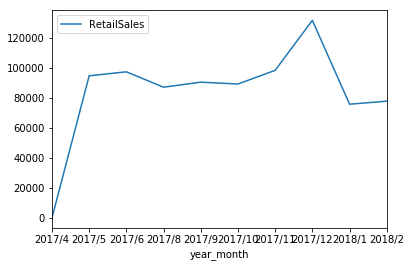

In [33]:
retail_sales_per_year_month.sort_values(['Year', 'Month'], ascending=[True, True]).plot(y=["RetailSales"])

## 6. Plot the same information as above but as a bar chart.

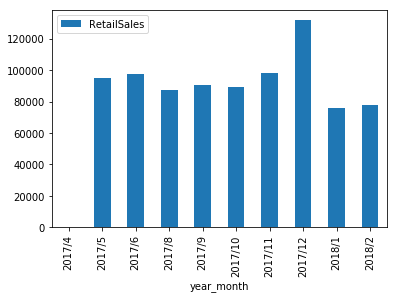

In [35]:
retail_sales_per_year_month.sort_values(['Year', 'Month'], ascending=[True, True]).plot.bar(y=["RetailSales"])

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

In [43]:
import plotly.plotly as py
import cufflinks as cf
cf.go_offline()


for_scatter = data[['RetailSales','RetailTransfers','ItemType']]
data.iplot(x='RetailSales', y='RetailTransfers', categories='ItemType',
           xTitle='Retail Sales', yTitle='Retail Transfers',
           title='Retail Sales & Retail Transfers according to their ItemType')

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13477c940>,
      dtype=object)

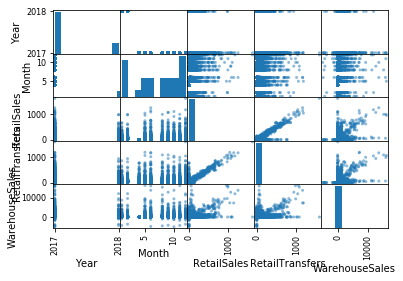

In [44]:
pd.plotting.scatter_matrix(data)